<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [137]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [138]:
import pprint as pprint

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [139]:
with open('./sat_scores.csv', 'r') as file:
    data = zip(*csv.reader(file))
#     Load csv into data variable
#     zip(*) transposes the file from [headers][data row1][data row 2][data..]
#     to [header0,data0.0,data0.1,..][header1,data1.1,data1.2,..]...

    sat_scores_dict = {row[0]: [cell for cell in row[1:]] for row in data}
#     Dictionary comprehension: keys are the header0,header1,etc
#     Values are the remaining list elements

# Older code convereted number strings into integers
#     sat_scores_dict = {row[0]: [int(cell) if cell.isdigit() == True
#                           else cell for cell in row[1:]] for row in data}

In [140]:
# Confirm
pprint.pprint(sat_scores_dict)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [141]:
# Using pandas read_csv for csv
sat_scores_df = pd.read_csv('./sat_scores.csv')
# Confirm
sat_scores_df.head(3)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515


In [142]:
# Using pandas.Dataframe for dictionary
sat_dict_df = pd.DataFrame(data=sat_scores_dict)
# Confirm
sat_dict_df.head(3)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515


In [143]:
# Checking the df's .dtypes
print('DataFrame from read_csv')
print(sat_scores_df.dtypes)
print('Numerical Columns are int64 types')
print('\n')
print('DataFrame from loading dictionary')
print(sat_dict_df.dtypes)
print('Numerical Columns are object types as all values were strings')

DataFrame from read_csv
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
Numerical Columns are int64 types


DataFrame from loading dictionary
State     object
Rate      object
Verbal    object
Math      object
dtype: object
Numerical Columns are object types as all values were strings


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [144]:
# As Asked
sat_scores_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [145]:
# Creaing data dictionary using dict()
sat_scores_df_datadictionary = dict(Shape=sat_dict_df.shape, State="obj; Two Letter Abbreviations of U.S. States",
                                    Rate="int64; Student SAT Participation Rate (%)", Verbal="int64; Average Verbal Scores", Math="int64; Average Math Scores")

In [146]:
# Confirm
pprint.pprint(sat_scores_df_datadictionary)

{'Math': 'int64; Average Math Scores',
 'Rate': 'int64; Student SAT Participation Rate (%)',
 'Shape': (52, 4),
 'State': 'obj; Two Letter Abbreviations of U.S. States',
 'Verbal': 'int64; Average Verbal Scores'}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [147]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
# Removing ALL STATES data row
sat_scores_df.drop(index=51, inplace=True)

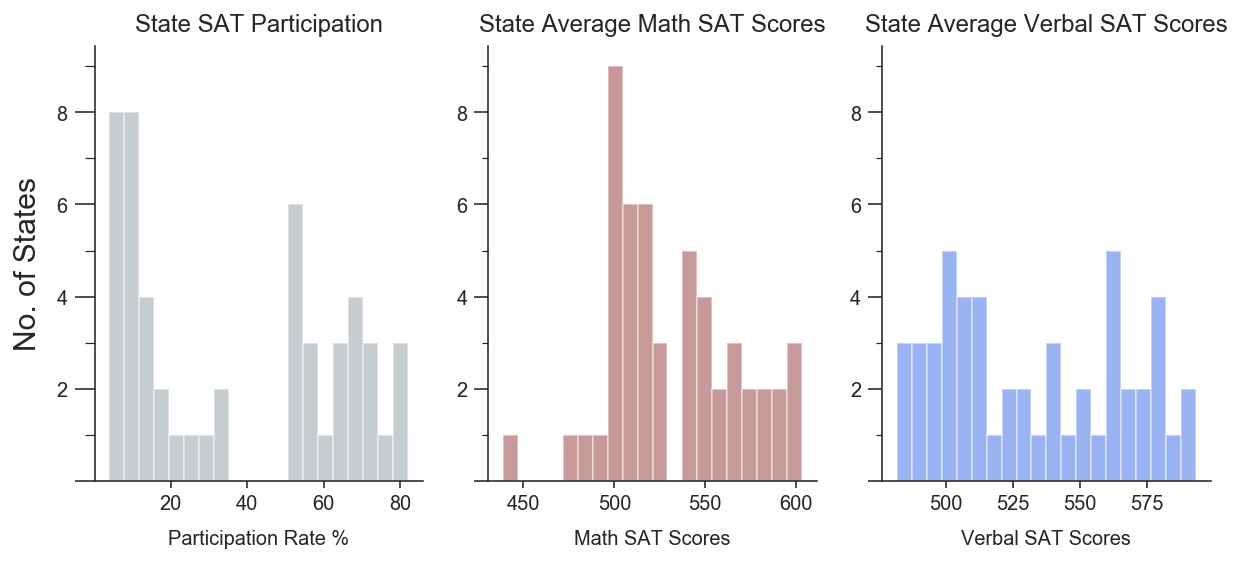

In [149]:
# DISTPLOT CODE BELOW

sns.set_style('ticks')
# Set style of plots

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
# Allow multiple plots in one figure


# 'RATE' distplot code
#   ax1 is the leftmost section of the subplot
sns.distplot(sat_scores_df['Rate'], bins=20, kde=False, color='xkcd:steel grey',
             ax=ax1)
# Create plot
#   Additional code that sets...
ax1.set_title('State SAT Participation', pad=7,
              fontdict={'fontsize': 12, 'fontweight': 10})
#     Title
ax1.set_ylabel('No. of States', labelpad=7,
               fontdict={'fontsize': 15, 'fontweight': 10})
#     Y axis label
ax1.set_xlabel('Participation Rate %', labelpad=8,
               fontdict={'fontsize': 10, 'fontweight': 10})
#     X axis label
ax1.set_yticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9], minor=True)
#     Y ticks with minor ticks
ax1.set_yticklabels(labels=[None, 2, 4, 6, 8])
#     Removes 0 tick label
ax1.tick_params(length=10, which='major', axis='y')
#     Adjust length of major ticks
ax1.tick_params(length=5, which='minor', axis='y')
#     Adjust length of minor ticks

# 'MATH' distplot code
#   ax2 is middle subplot section
sns.distplot(sat_scores_df['Math'], bins=20, kde=False, color='xkcd:blood',
             ax=ax2)
# Create plot
#   Additional code that sets...
ax2.set_title('State Average Math SAT Scores', pad=7,
              fontdict={'fontsize': 12, 'fontweight': 10})
#     Title
ax2.set_xlabel('Math SAT Scores', labelpad=8,
               fontdict={'fontsize': 10, 'fontweight': 10})
#     X axis label
ax2.tick_params(length=7, which='major', axis='y', labelleft=True)
#     Adjust major tick lengths
ax2.tick_params(length=3, which='minor', axis='y')
#     Adjust minor tick lengths


# 'VERBAL' disptlot code
#   ax3 is is the rightmost section
sns.distplot(sat_scores_df['Verbal'], bins=20, kde=False, color='xkcd:blue',
             ax=ax3)
# Create plot
#   Additional code that sets...
ax3.set_title('State Average Verbal SAT Scores', pad=7,
              fontdict={'fontsize': 12, 'fontweight': 10})
#     Title
ax3.set_xlabel('Verbal SAT Scores', labelpad=8,
               fontdict={'fontsize': 10, 'fontweight': 10})
#     X axis label
ax3.tick_params(length=7, which='major', axis='y', labelleft=True)
#     Adjust major tick lengths
ax3.tick_params(length=3, which='minor', axis='y')
#     Adjust minor tick lengths


sns.despine()
# Removes top and right frames of each plot

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

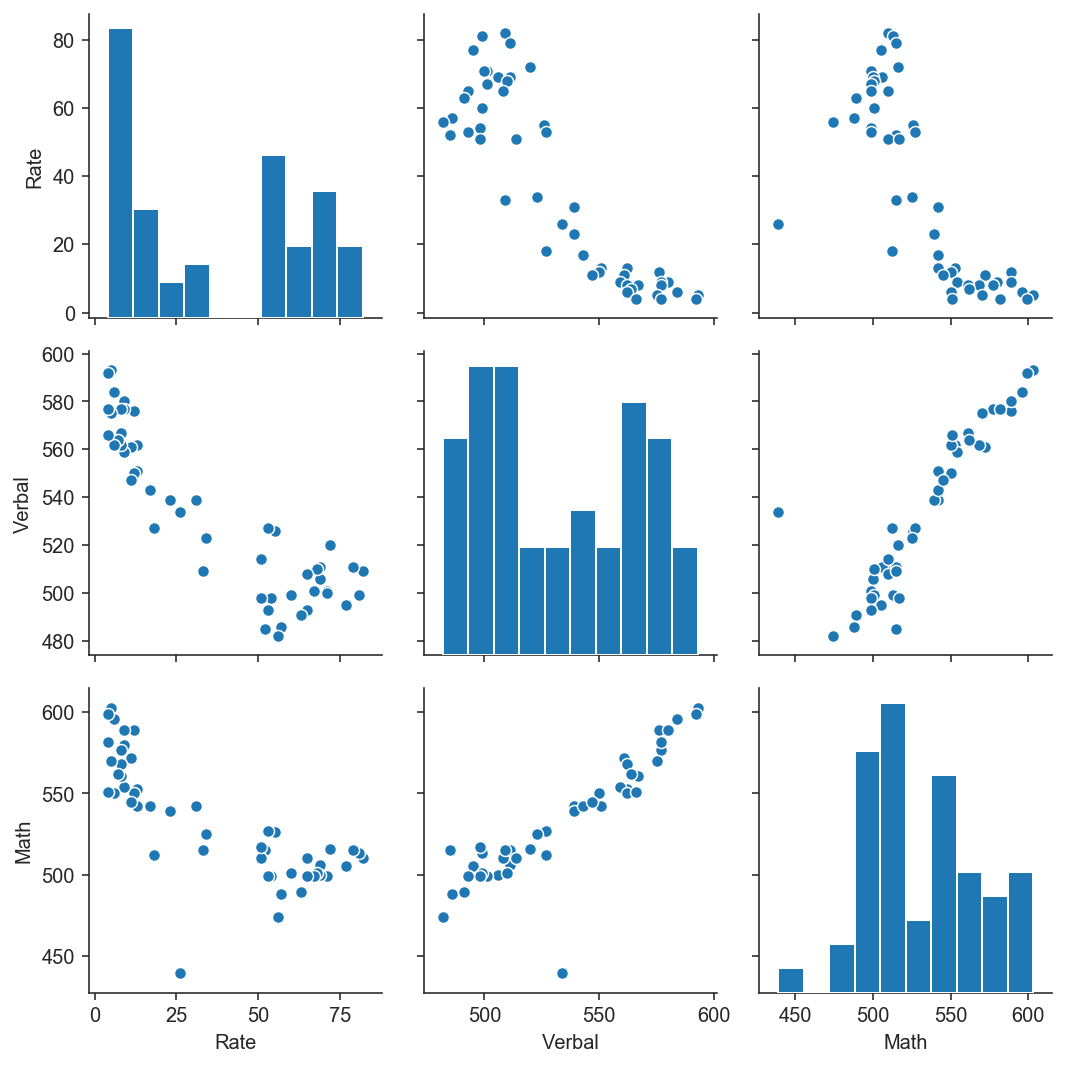

In [150]:
sns.set_style('ticks')
# Set plot style
sns.pairplot(sat_scores_df)
# Creates pairplot
plt.tight_layout()
# Prevents overlaying axis labels

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

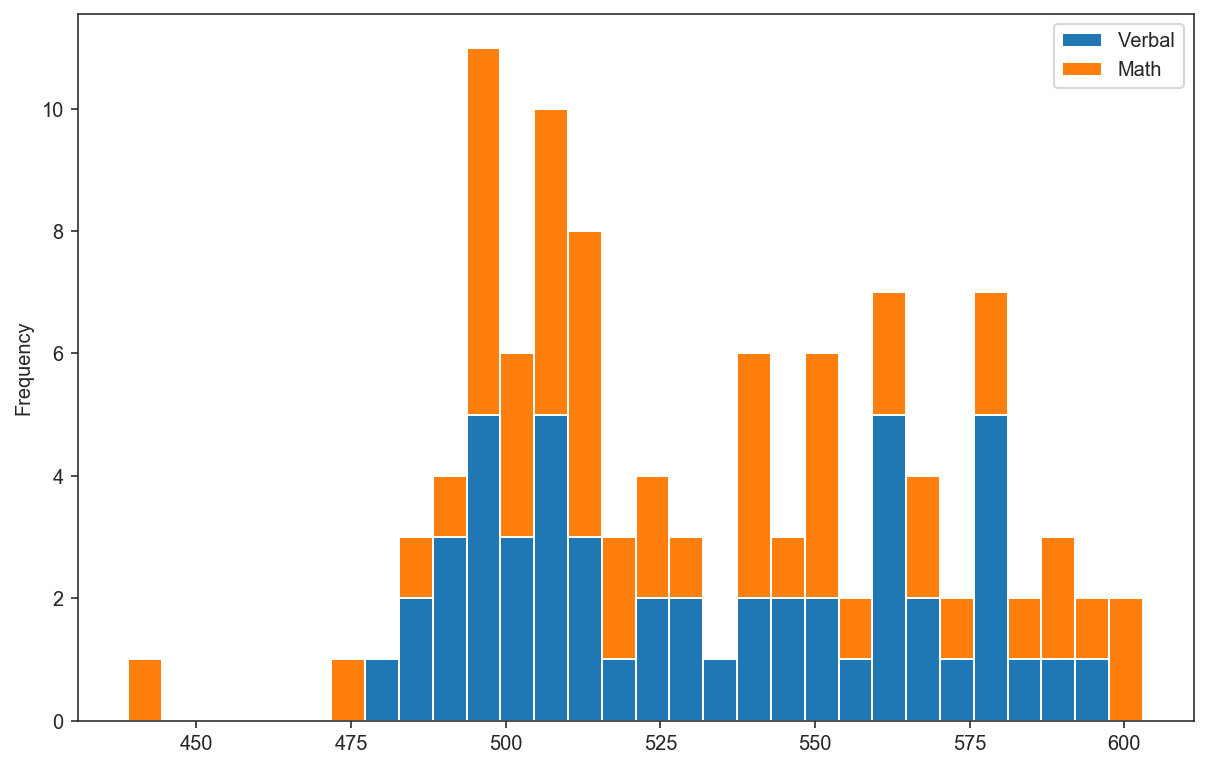

In [151]:
sat_scores_df[['Verbal', 'Math']].plot(
    kind='hist', bins=30, stacked=True, figsize=(10, 6.5))
# Creates stacked histogram

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

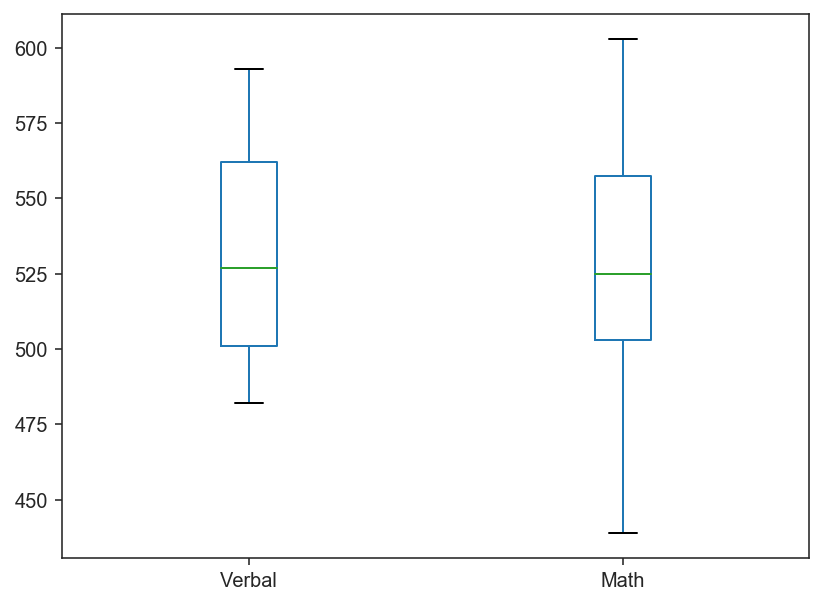

In [152]:
sat_scores_df[['Verbal', 'Math']].plot(
    kind='box', figsize=(6.7, 5), grid=False)
# Create boxplot

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [153]:
# Using Comparative Operations
sat_scores_df[sat_scores_df['Verbal'] >
              sat_scores_df['Verbal'].mean()]['State'].to_list()

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [154]:
# Using masking methods
mask = sat_scores_df['Verbal'] > sat_scores_df['Verbal'].mean()
sat_scores_df.loc[mask, 'State'].to_list()

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [155]:
# Using Comparative Operations
sat_scores_df[sat_scores_df['Verbal'] >
              sat_scores_df['Verbal'].median()]['State'].to_list()

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [156]:
# Using masking methods
mask = sat_scores_df['Verbal'] > sat_scores_df['Verbal'].median()
sat_scores_df.loc[mask, 'State'].to_list()

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

**Comparing >Median and >Mean lists**

In [157]:
median = set(sat_scores_df[sat_scores_df['Verbal'] >
                           sat_scores_df['Verbal'].median()]['State'].to_list())
mean = set(sat_scores_df[sat_scores_df['Verbal'] >
                         sat_scores_df['Verbal'].mean()]['State'].to_list())
# Creates sets of the above lists

In [158]:
print(f"""
Length of median is the same as mean's list:
Lenght of median: {len(median)}
Length of mean: {len(mean)}

Implying the mean could be similar to the median

MEAN: {sat_scores_df['Verbal'].mean()}
MEDIAN: {sat_scores_df['Verbal'].median()}
Which is TRUE!!!

The observed characteristics between the two list is due to this

You can also infer non-skewed distrubtion
""")


Length of median is the same as mean's list:
Lenght of median: 24
Length of mean: 24

Implying the mean could be similar to the median

MEAN: 532.5294117647059
MEDIAN: 527.0
Which is TRUE!!!

The observed characteristics between the two list is due to this

You can also infer non-skewed distrubtion



### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [159]:
# Column wise calculations in pandas is simple
sat_scores_df['Verbal - Math'] = sat_scores_df['Verbal'] - \
    sat_scores_df['Math']
# New column - 'Verbal - Math' - created by substraction the 'Math' series with 'Verbal'
sat_scores_df.head()
# Confirm

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [160]:
big10_verbal = sat_scores_df.sort_values('Verbal - Math')[-1:-11:-1]
# Slice the bottom 10 rows in reverse order: The top 10 biggest difference between Verbal and Math scores
# Where Verbal > Math.
big10_verbal.head(3)
# Confirm

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [161]:
big10_math = sat_scores_df.sort_values('Verbal - Math')[0:11]
# Slice the top 10 rows as given: The top 10 biggest difference between Verbal and Math scores
# Where Math > Verbal
big10_math.head(3)
# Confirm

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


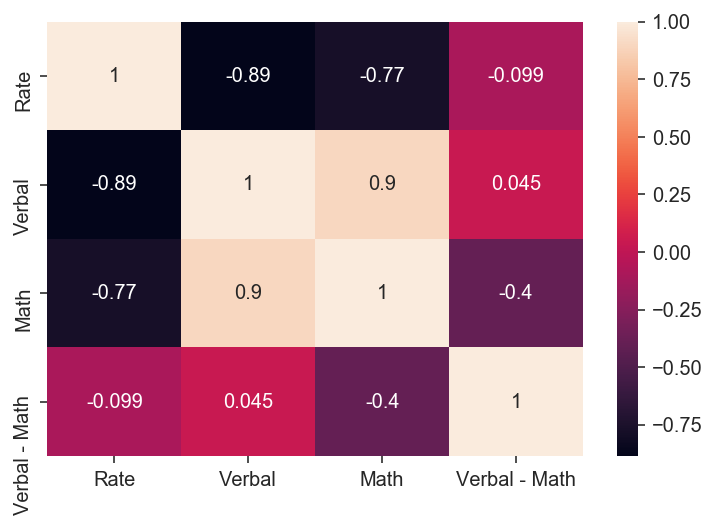

In [162]:
sns.heatmap(data=sat_scores_df.drop(labels='State', axis=1).corr(), annot=True)
# Create heatmap of the df's.corr() values with numbers provided (annot=True)
# After dropping State column.

In [163]:
# It lays out the correlation values for every pair of variables in the dataframe, in a visualy
# simple to interpet format

# There is a strong linear correlation between:
#     Verbal and Math Scores (Positive)
#     Rate of Participation and Verbal Scores (Negative)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [164]:
sat_scores_df.describe()

,Rate,Verbal,Math,Verbal - Math
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


| Row | Meaning |
|---|---|
|**Count** | Amount of Data Points in that column  |
|**Mean** |  The Average value in the column  |
|**STD**  | The Standard Deviation for the column | 
|**MIN**  | The lowest value in that column  |
|**25%** | The 25th percentile value in that column  |
|**50%** | The 50th percentile value in that column. Also the median| |**75%** | The 75th percentile value in that column   |
|**MAX** | The highest value in that column  |

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [165]:
sat_scores_df.cov()

,Rate,Verbal,Math,Verbal - Math
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Verbal - Math,-43.06,23.529412,-227.370196,250.899608


A correlation matrix have their values scaled from their covariance scores by dividing it with the two 
variable's standard deviations.
The result is that the values of a correlation matrix range between -1 and 1.
Both matrix's can be used to view the linear relationships in you data but are easier to interpret when using
a correlation matrix, due to the easier to understand range of values.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [166]:
druguse_df = pd.read_csv('drug-use-by-age.csv')

In [167]:
# Renaming frequency to median
columnsnames = ['age', 'n', 'alcohol-use', 'alcohol-median', 'marijuana-use',
                'marijuana-median', 'cocaine-use', 'cocaine-median', 'crack-use',
                'crack-median', 'heroin-use', 'heroin-median', 'hallucinogen-use',
                'hallucinogen-median', 'inhalant-use', 'inhalant-median',
                'pain-releiver-use', 'pain-releiver-median', 'oxycontin-use',
                'oxycontin-median', 'tranquilizer-use', 'tranquilizer-median',
                'stimulant-use', 'stimulant-median', 'meth-use', 'meth-median',
                'sedative-use', 'sedative-median']

druguse_df.columns = columnsnames

In [168]:
druguse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   17 non-null     object 
 1   n                     17 non-null     int64  
 2   alcohol-use           17 non-null     float64
 3   alcohol-median        17 non-null     float64
 4   marijuana-use         17 non-null     float64
 5   marijuana-median      17 non-null     float64
 6   cocaine-use           17 non-null     float64
 7   cocaine-median        17 non-null     object 
 8   crack-use             17 non-null     float64
 9   crack-median          17 non-null     object 
 10  heroin-use            17 non-null     float64
 11  heroin-median         17 non-null     object 
 12  hallucinogen-use      17 non-null     float64
 13  hallucinogen-median   17 non-null     float64
 14  inhalant-use          17 non-null     float64
 15  inhalant-median       17 

In [169]:
# Drug median column will have "-" if Drug Use = 0
# Making that column an object dtype
# Age is an object dtype because of the age ranges

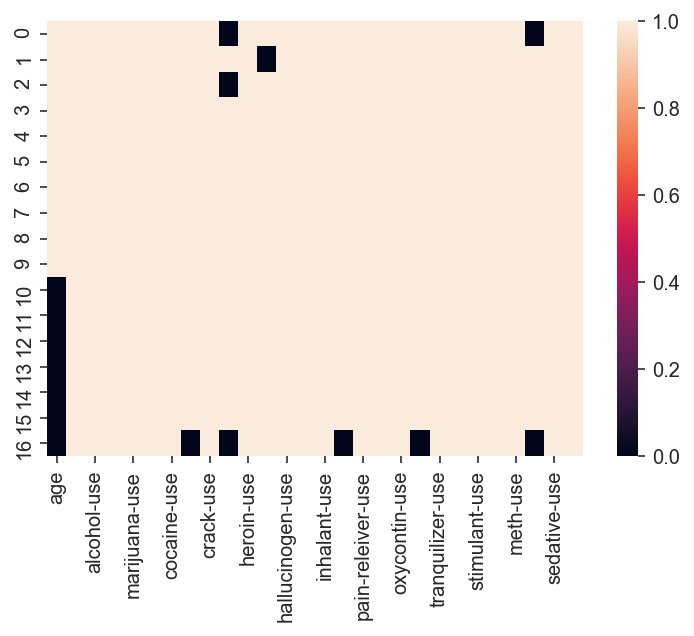

In [170]:
# Show non-floats using heatmap

# Function to detect floats:


def float_checker(x):
    try:
        if type(float(x)) == float:
            return True
    except:
        return False


# Plot Heatmap
sns.heatmap(druguse_df.applymap(float_checker))

# Clean Output
plt.show()

In [171]:
# Convert '-' in df to 0


def float_converter(x):
    try:
        return float(x)
    except:
        return 0 if x == '-' else x
# Function won't change ranges in age column


druguse_df = druguse_df.applymap(float_converter)
# Convert

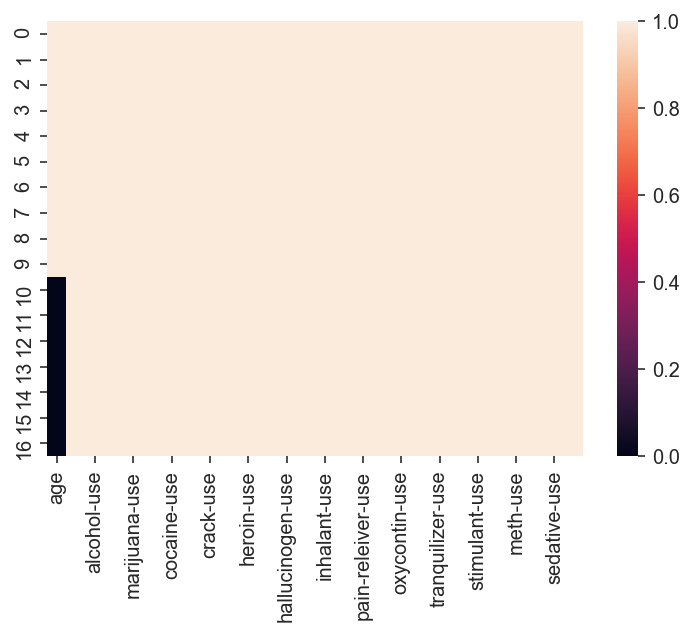

In [172]:
# Confirm
sns.heatmap(druguse_df.applymap(float_checker))
plt.show()
#     Clean Output

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

# Visualising Participants per Age Group


MEAN: 3251.0588235294117
MEDIAN: 2798.0
STD: 1297.8904263548327



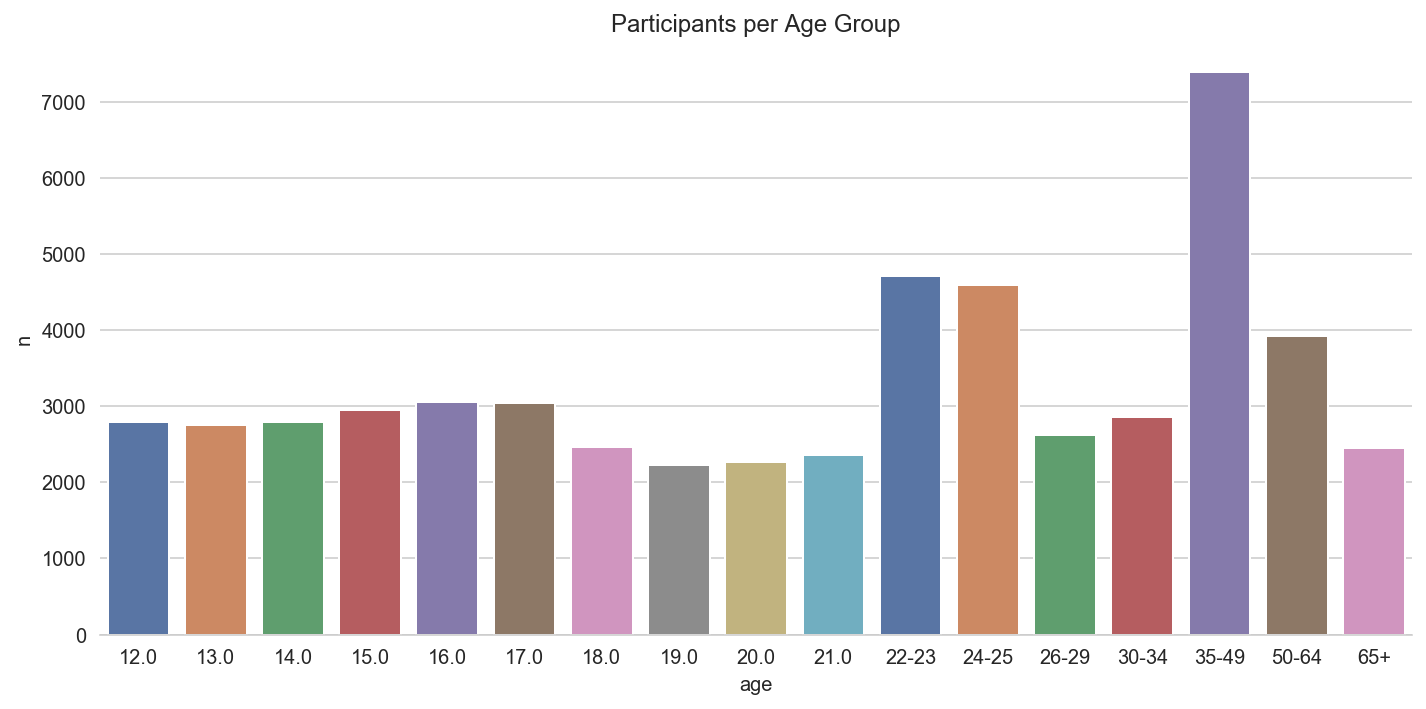

In [173]:
sns.set_style('whitegrid')
#     Set style

plt.figure(figsize=(10, 5))
sns.barplot(x=druguse_df.set_index('age').index,
            y=druguse_df['n'], palette='deep')
#     Plots graph

plt.title('Participants per Age Group')
#     Set title
plt.tight_layout()
#     Prevents overlaping labels
sns.despine(left=True)

print(f"""
MEAN: {druguse_df['n'].mean()}
MEDIAN: {druguse_df['n'].median()}
STD: {druguse_df['n'].std()}
""")
#     Prints mean, median, std of participants/age group

Most Age Groups have around 2000 to 3000 participants  
With bigger sample groups for 22-23, 24-25, 35-49, 50-64.  
Relative overrepresentation of particular age groups come down to sampling framework of the study 

# Visualising Boxplot distrubting of data points

In [174]:
# Seperating df into median and use columns
druguse = druguse_df.iloc[:, 2::2]
drugmedian = druguse_df.iloc[:, 3::2]

# Renaming columns
druguse.columns = ['alcohol', 'marijuana', 'cocaine', 'crack',
                   'heroin', 'hallucinogen', 'inhalant', 'pain-releiver',
                   'oxycontin', 'tranquilizer', 'stimulant', 'meth',
                   'sedative']

drugmedian.columns = ['alcohol', 'marijuana', 'cocaine', 'crack',
                      'heroin', 'hallucinogen', 'inhalant', 'pain-releiver',
                      'oxycontin', 'tranquilizer', 'stimulant', 'meth',
                      'sedative']

## Ploting Boxplots

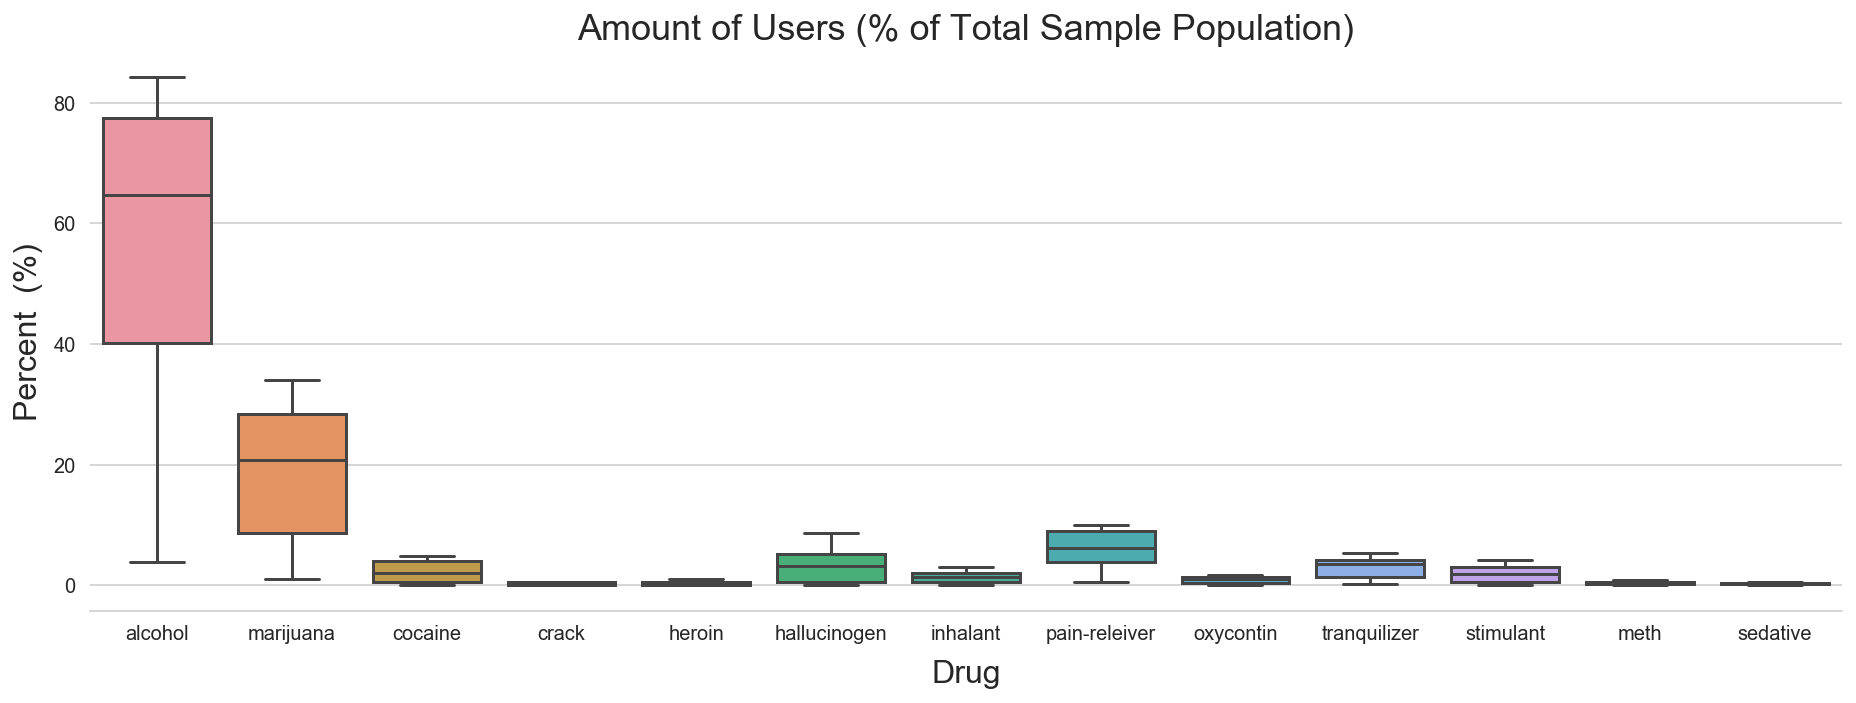

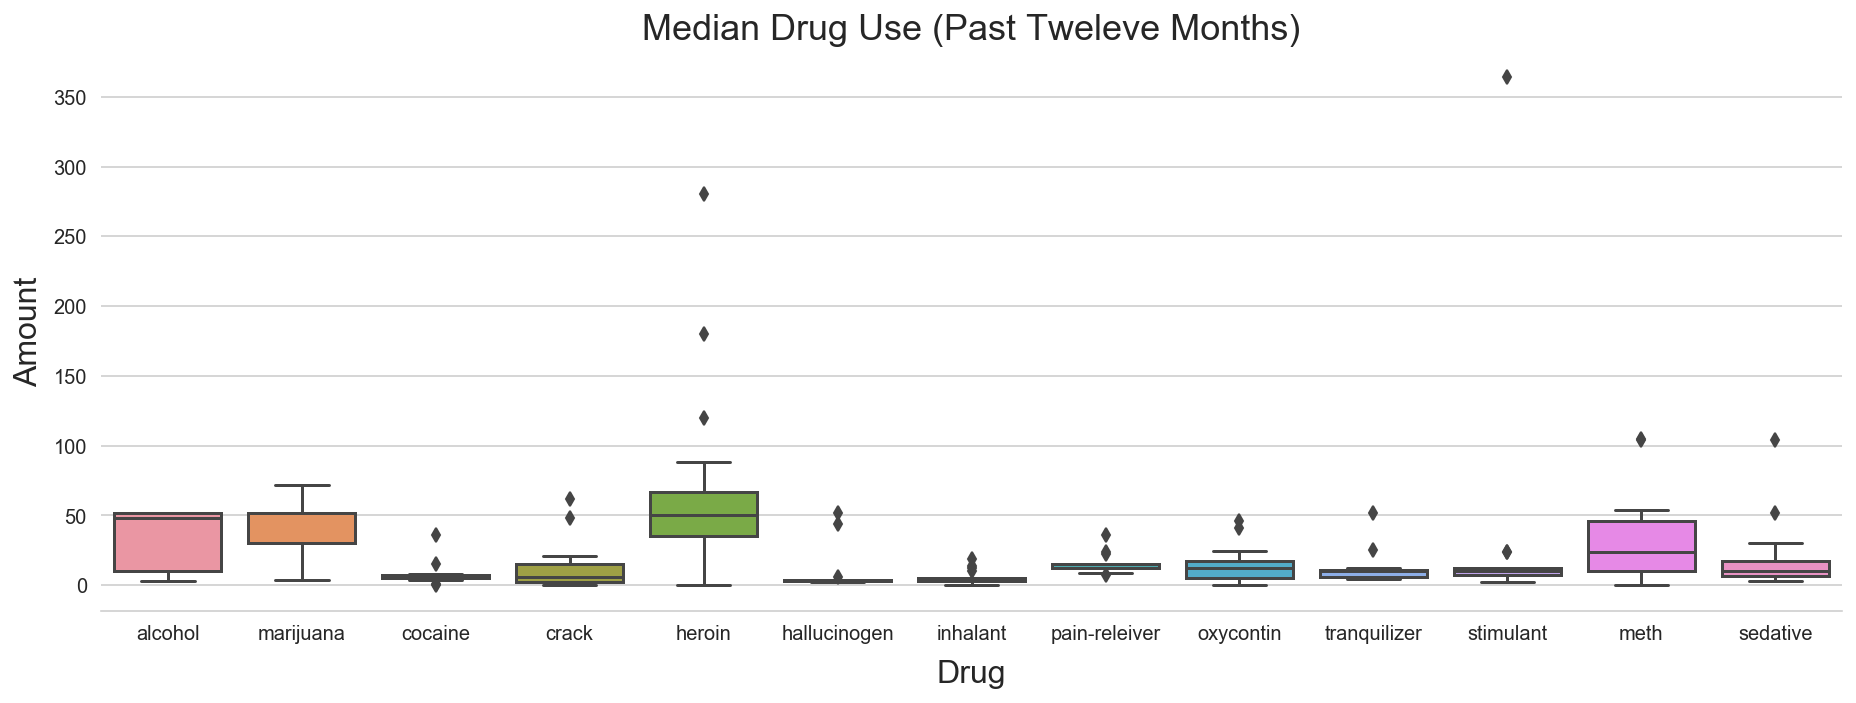

In [175]:
# Boxplot for Drug Users
plt.figure(figsize=(13, 5))
sns.boxplot(data=druguse)
plt.xlabel('Drug', labelpad=8, fontdict={'fontsize': 16})
plt.ylabel('Percent  (%)', fontdict={'fontsize': 16}, labelpad=5)
plt.title('Amount of Users (% of Total Sample Population)',
          pad=6, fontdict={'fontsize': 18})
plt.tight_layout()

# Despine
sns.despine(left=True)

# Boxplot for Median Drug Use
plt.figure(figsize=(13, 5))
sns.boxplot(data=drugmedian)
plt.xlabel('Drug', labelpad=8, fontdict={'fontsize': 16})
plt.ylabel('Amount', fontdict={'fontsize': 16}, labelpad=5)
plt.title('Median Drug Use (Past Tweleve Months)',
          pad=6, fontdict={'fontsize': 18})
plt.tight_layout()

# Despine
sns.despine(left=True)

##### Analysis
- Percentage of Drug Users are small (<10%) for all drugs across all age groups excluding the legal drug alcohol and the slowly socially acceptable marijuana
- Ignoring outliers, Alochol, Marijuana, Heroin, and Meth have higher median use of the drug compared to others.
- All drugs have outliers in the median use of the drug (excluding alcohol and marijuana) highlighting the high upper limit for illegal addictive drug use

# Seperating DataFrame between 21's and under and over 21's

In [176]:
# Create Seperate DataFrames for under 21's and over 21s
# (Seperating age groups with single ages and age ranges)

druguse_21under = druguse_df[0:10]
druguse_21above = druguse_df[10:17]

druguse_21under.set_index('age', inplace=True)
druguse_21above.set_index('age', inplace=True)
#     Setting index to age column

In [177]:
# Confirm
druguse_21under.tail(3)

,n,alcohol-use,alcohol-median,marijuana-use,marijuana-median,cocaine-use,cocaine-median,crack-use,crack-median,heroin-use,...,oxycontin-use,oxycontin-median,tranquilizer-use,tranquilizer-median,stimulant-use,stimulant-median,meth-use,meth-median,sedative-use,sedative-median
age,,,,,,,,,,,,,,,,,,,,,
19.0,2223.0,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20.0,2271.0,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
21.0,2354.0,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [178]:
# Confirm
druguse_21above.head(3)

,n,alcohol-use,alcohol-median,marijuana-use,marijuana-median,cocaine-use,cocaine-median,crack-use,crack-median,heroin-use,...,oxycontin-use,oxycontin-median,tranquilizer-use,tranquilizer-median,stimulant-use,stimulant-median,meth-use,meth-median,sedative-use,sedative-median
age,,,,,,,,,,,,,,,,,,,,,
22-23,4707.0,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,1.1,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
24-25,4591.0,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,0.7,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
26-29,2628.0,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,0.6,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0


# Categorising Drugs into these categories
| Drug Category | Drugs |
|---|---|
|**LEGAL**|Alcohol, Marijuana|
|**HARD**|Cocaine, Crack, Heroin, Meth|
|**MEDICAL**|Pain-releiver, oxycontin, tranquilizer, stimulant, sedative|
|**OTHER**|Hallucinogen, Inhalant|

*Drugs were organised based on the hypothesis that similar catergories have similar patterns of use.*

# Analysing 21 and Under Age Group

### Legal

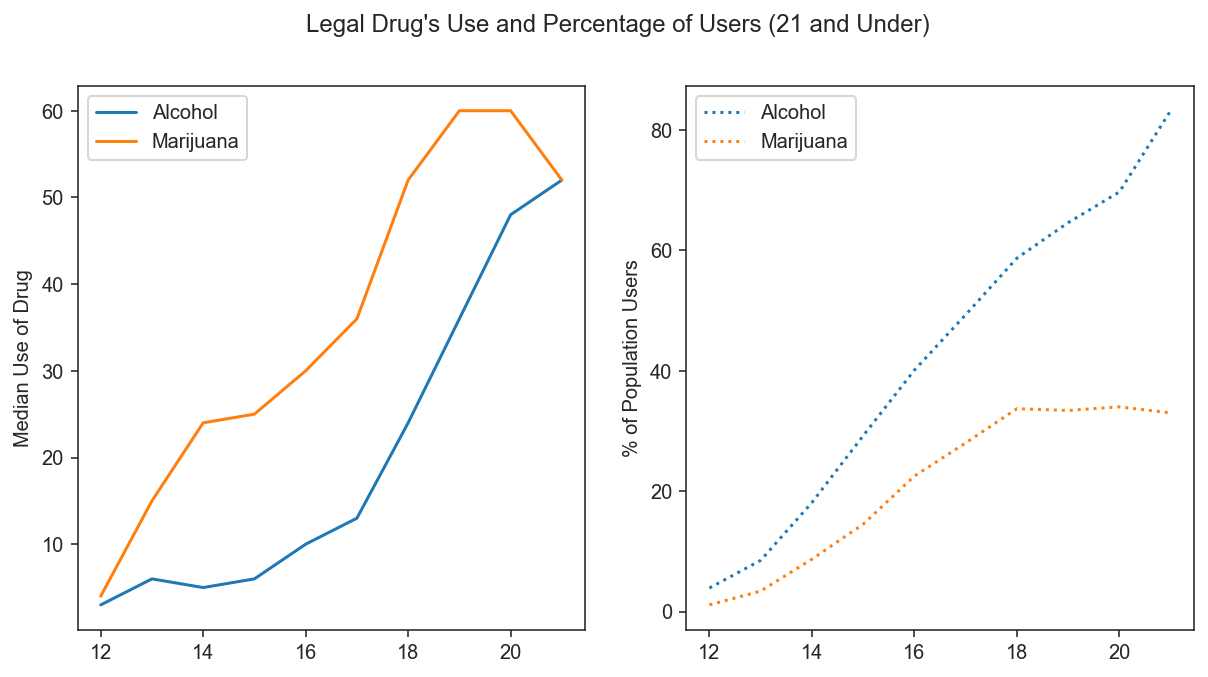

In [179]:
# The Following Code Blocks in this section follow the same format.

sns.set_style('ticks')
#     Set style of plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
#     Create soubplot for multiple plots in a graph

ax1.plot(druguse_21under['alcohol-median'], label='Alcohol')
ax1.plot(druguse_21under['marijuana-median'], label='Marijuana')
ax1.set_ylabel('Median Use of Drug')
ax1.legend()
#     Plot's Line Graph. label= provides name for legend key

ax2.plot(druguse_21under['alcohol-use'], linestyle=':', label='Alcohol')
ax2.plot(druguse_21under['marijuana-use'], linestyle=':', label='Marijuana')
ax2.set_ylabel('% of Population Users')
ax2.legend()
#     Plots graph

plt.suptitle("Legal Drug's Use and Percentage of Users (21 and Under)")
#     Provides Title for SubPlot

plt.show()
#     Cleans Output

 - Median Use of the Legal Drugs Increases with Age
 - Percentage of User's Increases with Age but tapers off at 18 year old users for marijuana. 
 - As we will show when analysing the data for the other age groups, the Median Use and Percentage of Users for both these drugs peaks at the 18-21 age groups

### Hard

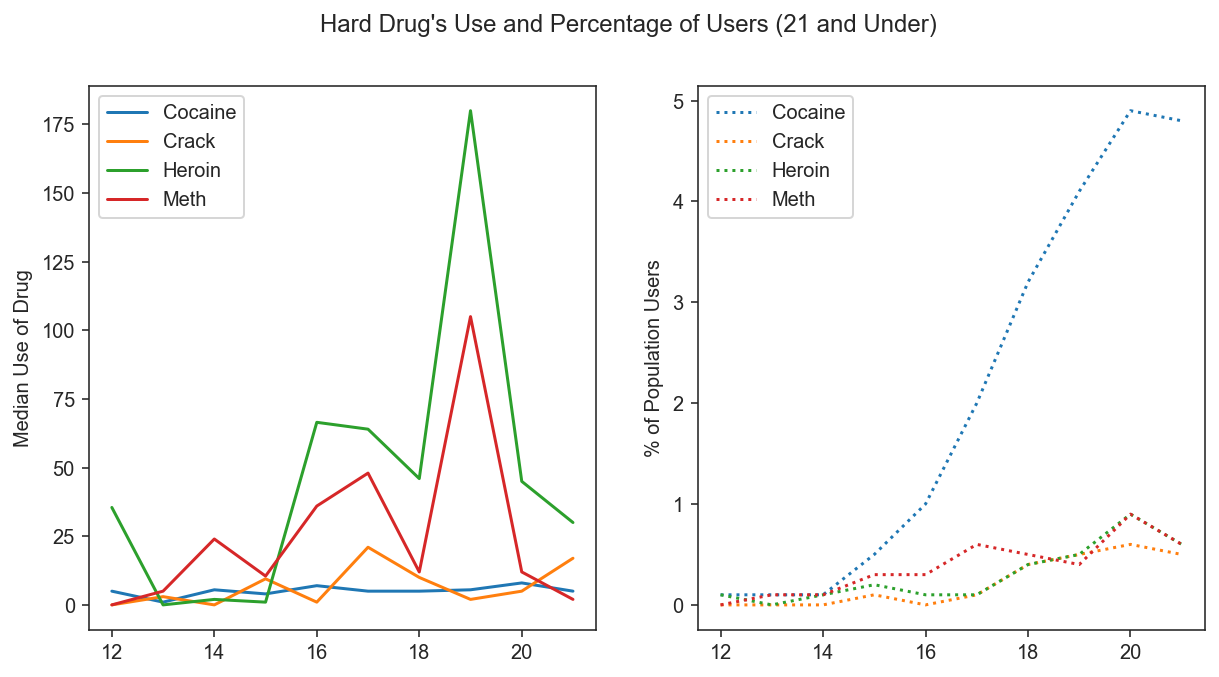

In [180]:
# Refer to first code block in this notebook section for
# Comments and Code Formatting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(druguse_21under['cocaine-median'], label='Cocaine')
ax1.plot(druguse_21under['crack-median'], label='Crack')
ax1.plot(druguse_21under['heroin-median'], label='Heroin')
ax1.plot(druguse_21under['meth-median'], label='Meth')
ax1.set_ylabel('Median Use of Drug')
ax1.legend()

ax2.plot(druguse_21under['cocaine-use'], linestyle=':', label='Cocaine')
ax2.plot(druguse_21under['crack-use'], linestyle=':', label='Crack')
ax2.plot(druguse_21under['heroin-use'], linestyle=':', label='Heroin')
ax2.plot(druguse_21under['meth-use'], linestyle=':', label='Meth')

ax2.set_ylabel('% of Population Users')
ax2.legend()

plt.suptitle("Hard Drug's Use and Percentage of Users (21 and Under)")

plt.show()

- Median Drug Use for Cocaine and Crack are similar
- Median Drug Use for Heroin and Meth are higher
- All Drugs in this catergory have more users as the age group increases. Cocaine User's Dwarf the other drugs with 5% of the population using the drug at 21 years of age.

### Medical

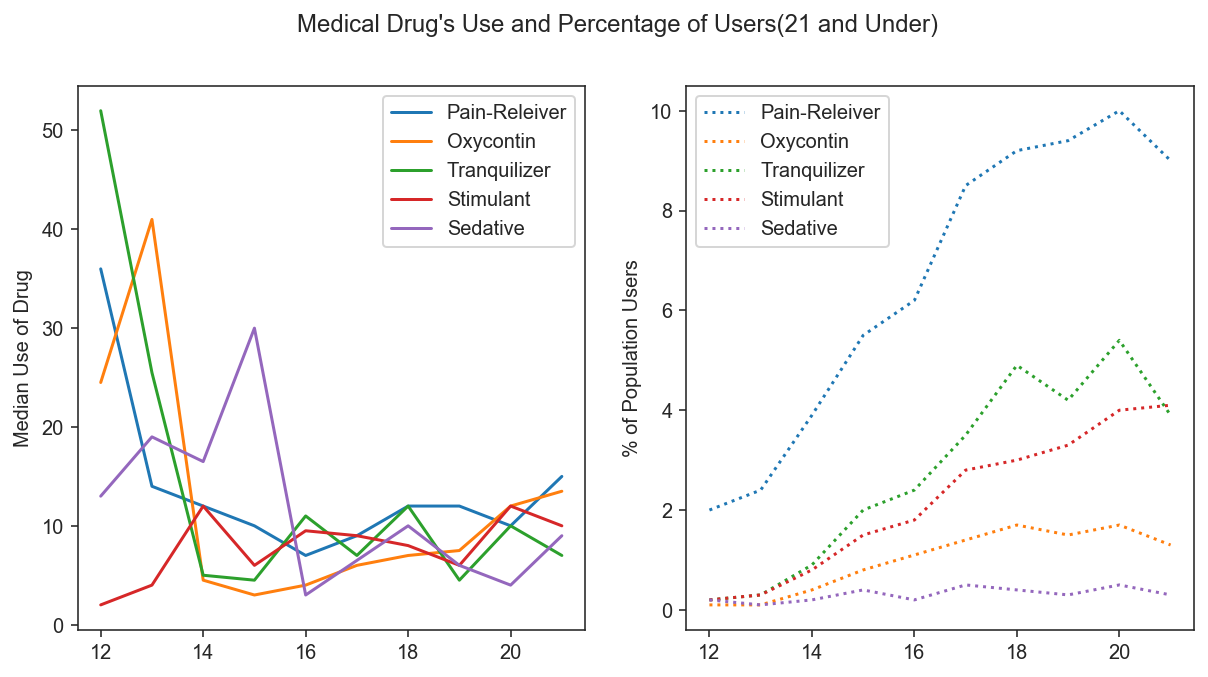

In [181]:
# Refer to first code block in this notebook section for
# Comments and Code Formatting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(druguse_21under['pain-releiver-median'], label='Pain-Releiver')
ax1.plot(druguse_21under['oxycontin-median'], label='Oxycontin')
ax1.plot(druguse_21under['tranquilizer-median'], label='Tranquilizer')
ax1.plot(druguse_21under['stimulant-median'], label='Stimulant')
ax1.plot(druguse_21under['sedative-median'], label='Sedative')
ax1.set_ylabel('Median Use of Drug')
ax1.legend()

ax2.plot(druguse_21under['pain-releiver-use'],
         linestyle=':', label='Pain-Releiver')
ax2.plot(druguse_21under['oxycontin-use'], linestyle=':', label='Oxycontin')
ax2.plot(druguse_21under['tranquilizer-use'],
         linestyle=':', label='Tranquilizer')
ax2.plot(druguse_21under['stimulant-use'], linestyle=':', label='Stimulant')
ax2.plot(druguse_21under['sedative-use'], linestyle=':', label='Sedative')

ax2.set_ylabel('% of Population Users')
ax2.legend()

plt.suptitle("Medical Drug's Use and Percentage of Users(21 and Under)")

plt.show()

- All Drugs in the Medical Category Peak in the Amount of Users at around 20 years of age.
- Pain releiver have the highest amount of users
- Although at around that age, median drug use stablises to around 10 uses
- The larger amount of use at younger ages is amazing. One hypothesis is the higher exposure to parental users of the drug. Another is on the grounds of child abuse, parents administer the drug to the children to abuse them or to manage their childern.

### Other

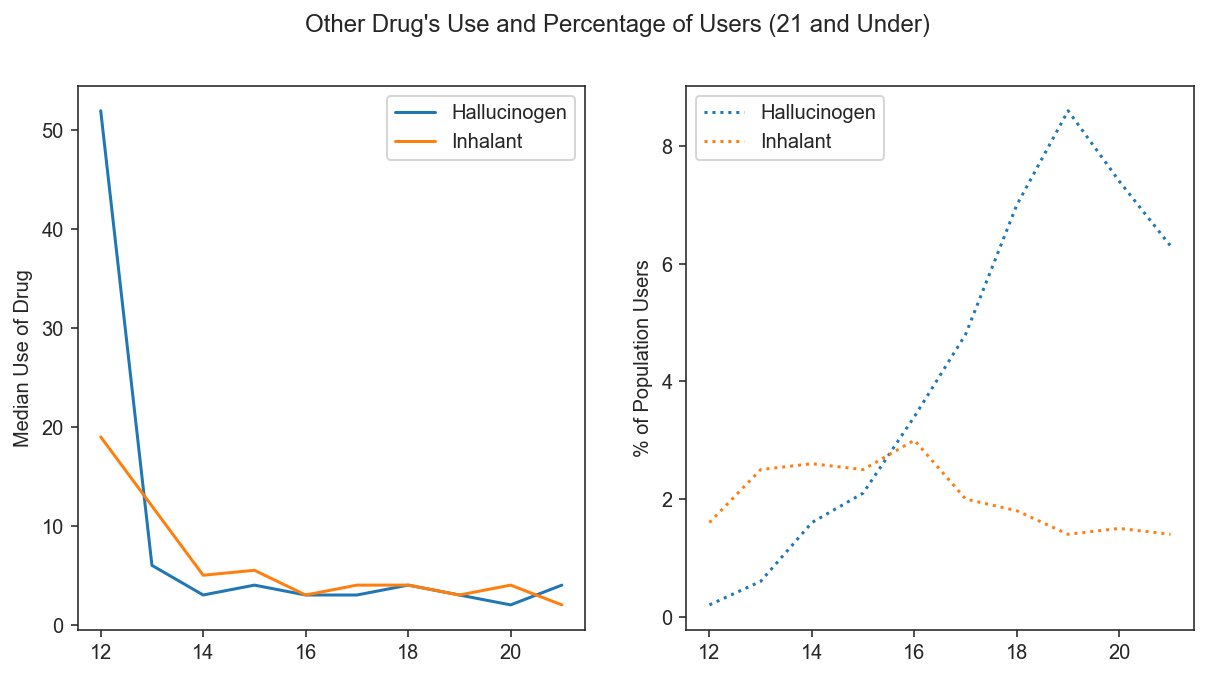

In [182]:
# Refer to first code block in this notebook section for
# Comments and Code Formatting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(druguse_21under['hallucinogen-median'], label='Hallucinogen')
ax1.plot(druguse_21under['inhalant-median'], label='Inhalant')
ax1.set_ylabel('Median Use of Drug')
ax1.legend()

ax2.plot(druguse_21under['hallucinogen-use'],
         linestyle=':', label='Hallucinogen')
ax2.plot(druguse_21under['inhalant-use'], linestyle=':', label='Inhalant')
ax2.set_ylabel('% of Population Users')
ax2.legend()

plt.suptitle("Other Drug's Use and Percentage of Users (21 and Under)")

plt.show()

- % of Hallucinogen Users have the same peaking pattern at age 19. Inhalant Users starts at 2% and falls to 1 with 17 year old users.
- The same observation found in Medical Drug Use is also found in this cateogry, but is limited to the 12-14 age groups. The same child abuse hypothesis applies to these observations as well.

# Analysing Above 21's

It seems reasonable to not plot linegraphs for the >21's dataframe. The age groups are categorial and barplot are appropiate for comparing categories.

### Legal

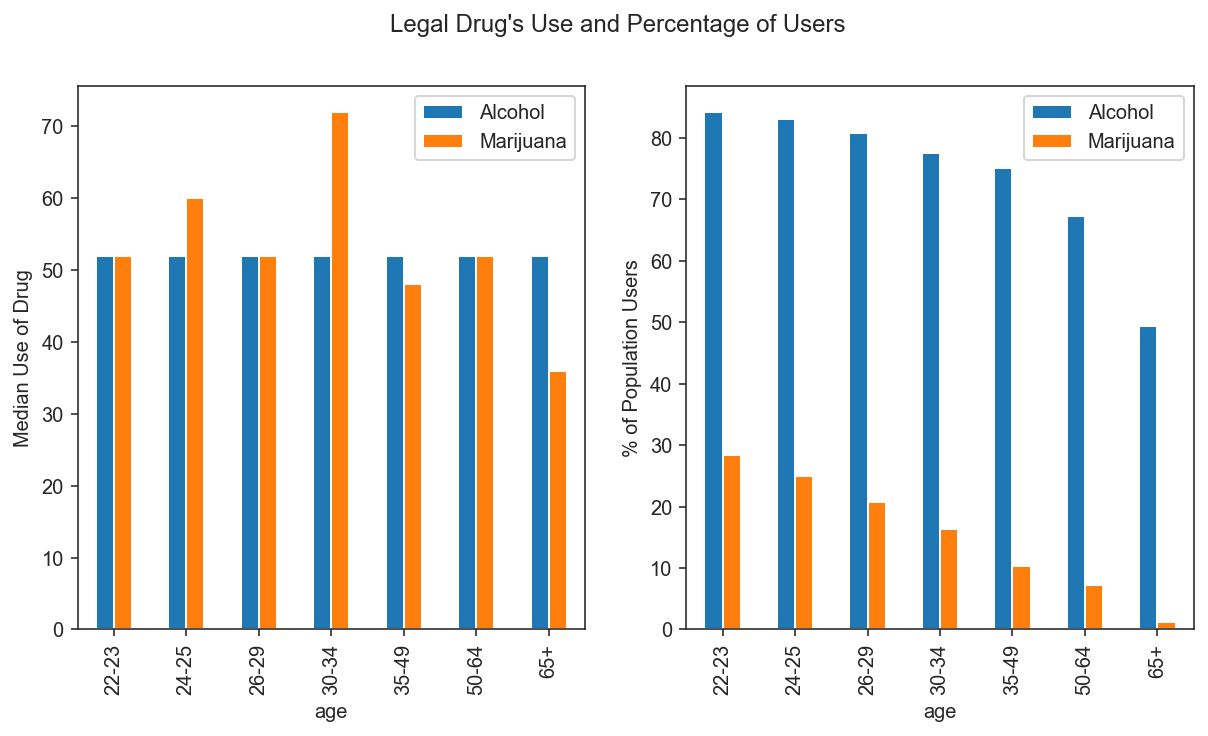

In [183]:
# The Following Code Blocks in this section follow the same format.

sns.set_style('ticks')
#     Set plot style

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
#     Create subplot for multiple plots in a graph


druguse_21above[['alcohol-median', 'marijuana-median']
                ].plot(kind='bar', ax=ax1)
ax1.set_ylabel('Median Use of Drug')
ax1.legend(['Alcohol', 'Marijuana'])
#     Plots Graph
#     List in .legen() provides legend keys

druguse_21above[['alcohol-use', 'marijuana-use']].plot(kind='bar', ax=ax2)
ax2.set_ylabel('% of Population Users')
ax2.legend(['Alcohol', 'Marijuana'])
#     Plots Graph

plt.suptitle("Legal Drug's Use and Percentage of Users")
#     Set Title for Entire Subplot

# Clean Output
plt.show()

### Hard

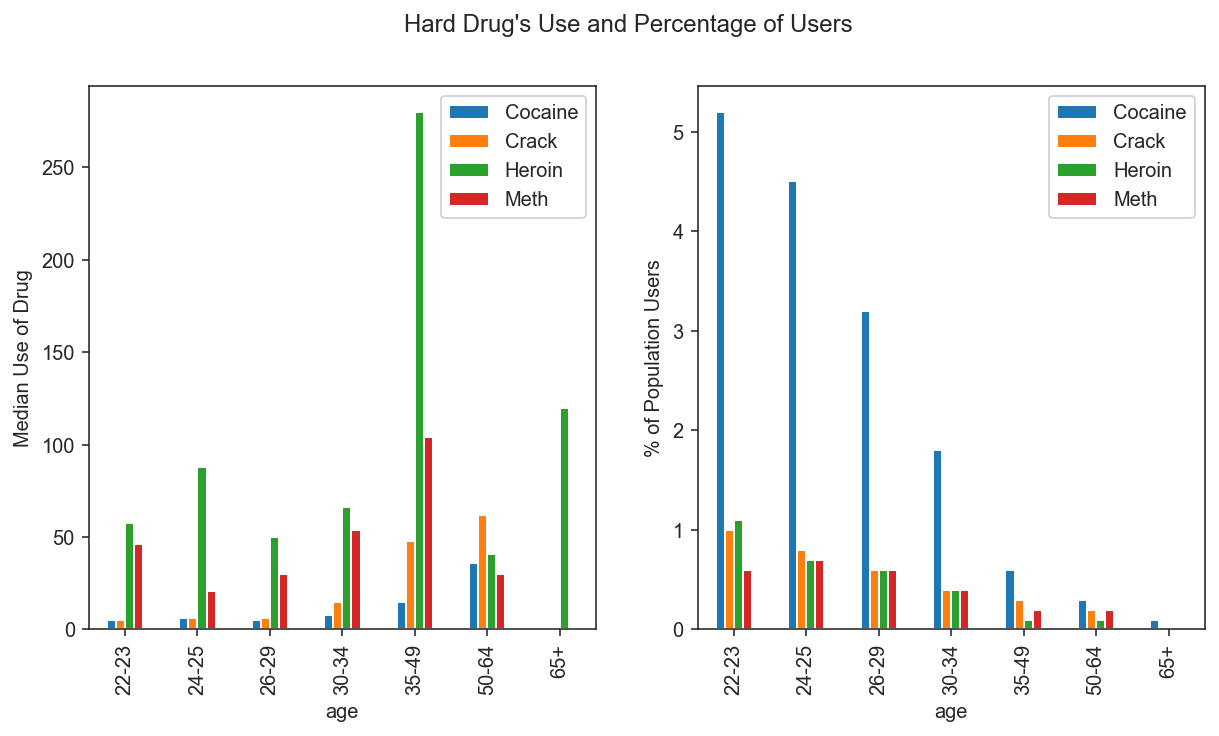

In [184]:
# Refer to first code block in this notebook section for
# Comments and Code Formatting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


druguse_21above[['cocaine-median', 'crack-median', 'heroin-median',
                 'meth-median']].plot(kind='bar', ax=ax1)
ax1.set_ylabel('Median Use of Drug')
ax1.legend(['Cocaine', 'Crack', 'Heroin', 'Meth'])


druguse_21above[['hallucinogen-use', 'inhalant-use', 'heroin-use',
                 'meth-use']].plot(kind='bar', ax=ax2)
ax2.set_ylabel('% of Population Users')
ax2.legend(['Cocaine', 'Crack', 'Heroin', 'Meth'])


plt.suptitle("Hard Drug's Use and Percentage of Users")


plt.show()

### Medical

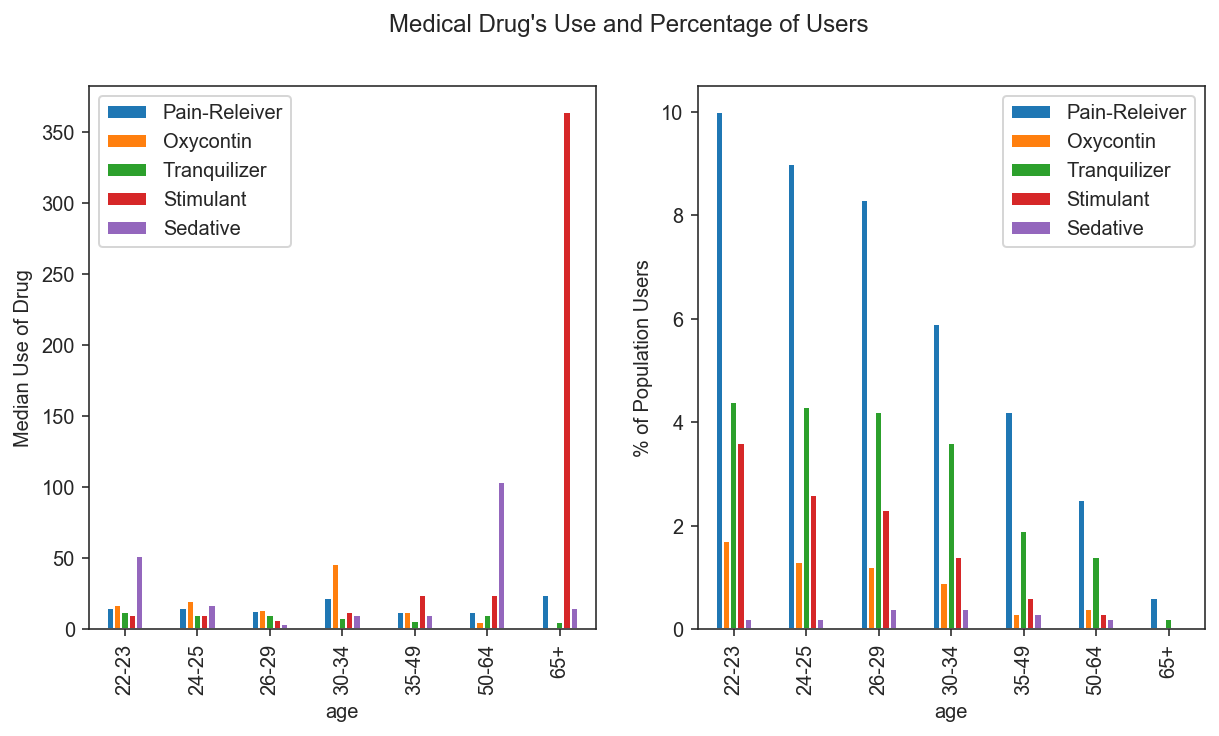

In [185]:
# Refer to first code block in this notebook section for
# Comments and Code Formatting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


druguse_21above[['pain-releiver-median', 'oxycontin-median', 'tranquilizer-median',
                 'stimulant-median', 'sedative-median']].plot(kind='bar', ax=ax1)
ax1.set_ylabel('Median Use of Drug')
ax1.legend(['Pain-Releiver', 'Oxycontin',
            'Tranquilizer', 'Stimulant', 'Sedative'])


druguse_21above[['pain-releiver-use', 'oxycontin-use', 'tranquilizer-use',
                 'stimulant-use', 'sedative-use']].plot(kind='bar', ax=ax2)
ax2.set_ylabel('% of Population Users')
ax2.legend(['Pain-Releiver', 'Oxycontin',
            'Tranquilizer', 'Stimulant', 'Sedative'])


plt.suptitle("Medical Drug's Use and Percentage of Users")


plt.show()

### Other

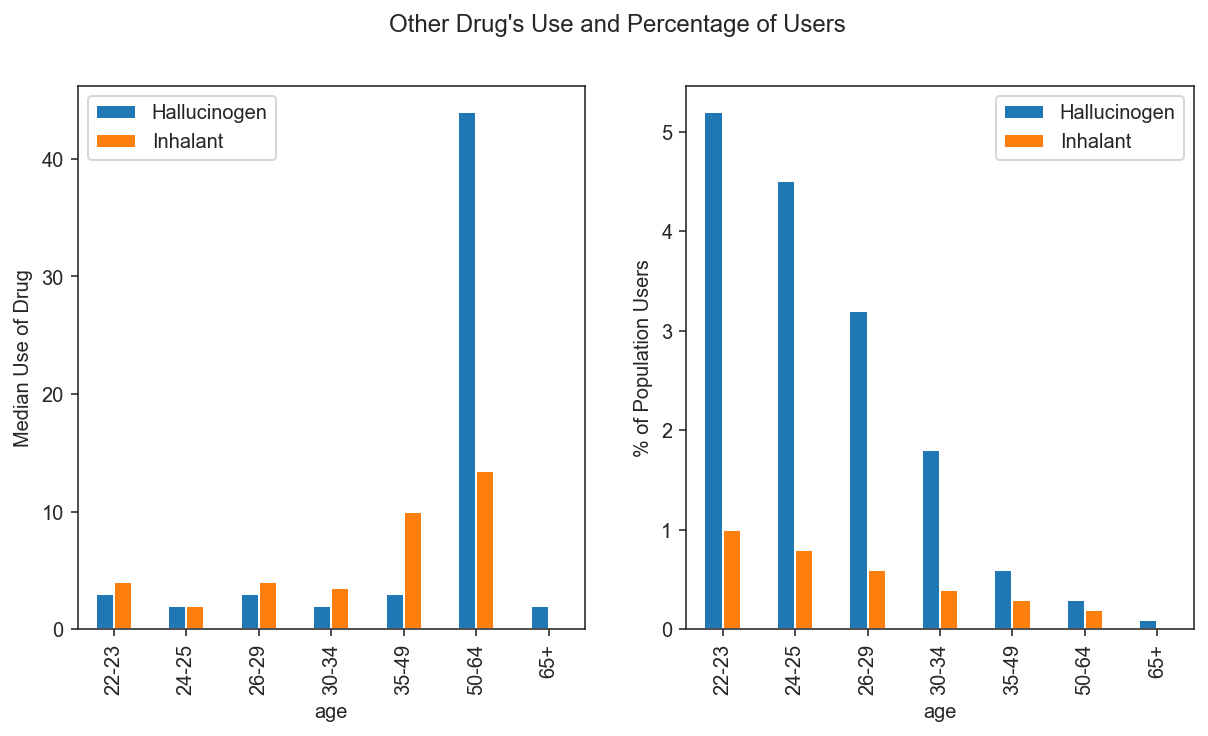

In [186]:
# Refer to first code block in this notebook section for
# Comments and Code Formatting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


druguse_21above[['hallucinogen-median', 'inhalant-median']
                ].plot(kind='bar', ax=ax1)
ax1.set_ylabel('Median Use of Drug')
ax1.legend(['Hallucinogen', 'Inhalant'])


druguse_21above[['hallucinogen-use', 'inhalant-use']].plot(kind='bar', ax=ax2)
ax2.set_ylabel('% of Population Users')
ax2.legend(['Hallucinogen', 'Inhalant'])


plt.suptitle("Other Drug's Use and Percentage of Users")

plt.show()

# Observation of Correlations

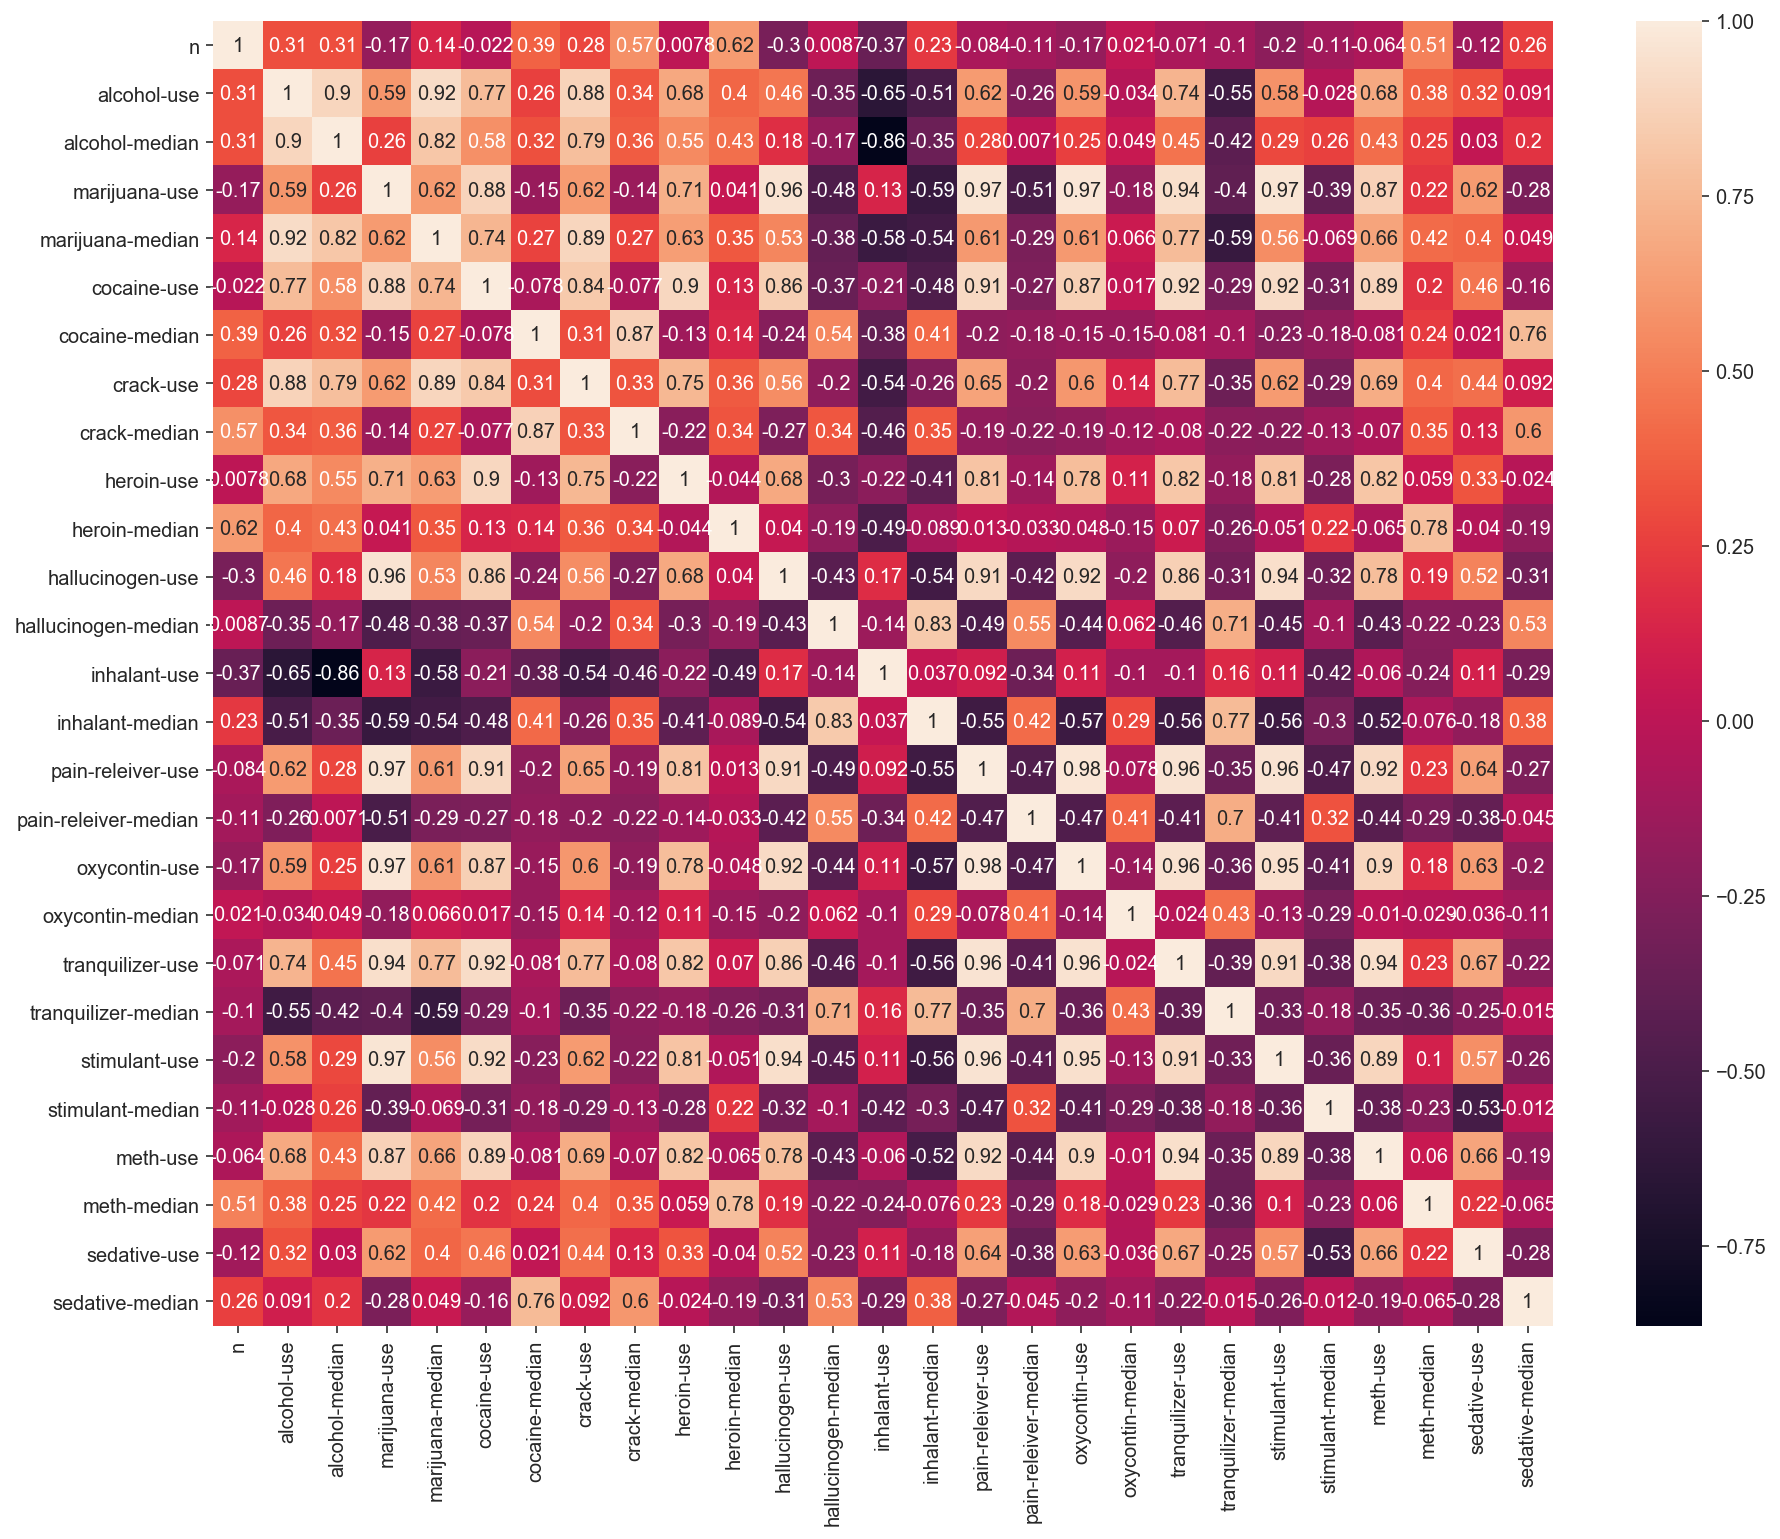

In [187]:
# Creating a correlation heatmap
plt.figure(figsize=(15, 12))
#     Set's figure size
sns.heatmap(data=druguse_df.set_index('age').corr(), annot=True)
#     Create heatmap
plt.show()
#     Clean Output

#### Table of Note Worthly Correlations (>=|0.9|)

|Column| correlates well with|
|---|---|
|Alcohol Use | alcohol median and marijuana median
|Marijuana use | stimulant use, tranquilizer use, oxycontin use, pain-releiver-use, hallucinogen use
|Cocaine use | stimulant use, tranquilizer use, pain releiver use, heroin use, 
|Hallucinogen use | stimulant use, oxycontin use, painreleiver use
|Pain releiver use | meth use, stimulant use, tranquilizer use, oxycontin use
|Oxycotin use | meth use, stimulant use, tranquilizer use
|Tranquilizer use | meth use, stimulant use

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

**QUESTION**: Is the average percentage of inhalant users equal to the aver percentage of oxycotin users

**DELIVERABLES**:
- Mean, Standard Deviation, Standard Error of Mean for Percentage of Inhalant Users
- Mean, Standard Deviation, Standard Error of Mean for Percentage of Oxycontin users
- Probablitity Curves of the Mean's 
- T-statistic and P values of the Null Hypothesis Test


**CODE**

In [188]:
# f printing with docstring for easy printing of variables/results
print(f"""
INHALANT
MEAN: {druguse['inhalant'].mean()}
STD: {druguse['inhalant'].std()}
SEM: {druguse['inhalant'].sem()}
""")

print(f"""
OXYCONTIN
MEAN: {druguse['oxycontin'].mean()}
STD: {druguse['oxycontin'].std()}
SEM: {druguse['oxycontin'].sem()}
""")


INHALANT
MEAN: 1.388235294117647
STD: 0.9272825573558853
SEM: 0.2248990546335989


OXYCONTIN
MEAN: 0.9352941176470588
STD: 0.608215809222545
SEM: 0.14751400144676902



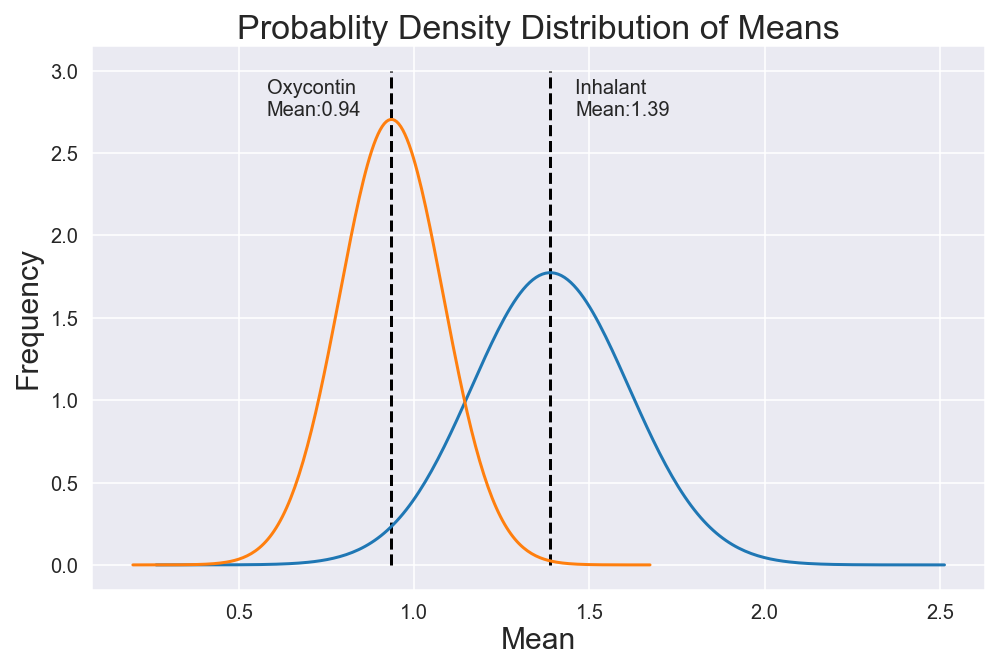

In [189]:
# Creating Probability Distrubtion of Means

# Creating Xpoints
inhalant_xpoints = np.linspace(druguse['inhalant'].mean() - druguse['inhalant'].sem()*5,
                               druguse['inhalant'].mean() + druguse['inhalant'].sem()*5, 250)
oxycontin_xpoints = np.linspace(druguse['oxycontin'].mean() - druguse['oxycontin'].sem()*5,
                                druguse['oxycontin'].mean() + druguse['oxycontin'].sem()*5, 250)

# Creating Ypoints
inhalant_ypoints = stats.norm.pdf(
    inhalant_xpoints, druguse['inhalant'].mean(), druguse['inhalant'].sem())
oxycontin_ypoints = stats.norm.pdf(oxycontin_xpoints, druguse['oxycontin'].mean(),
                                   druguse['oxycontin'].sem())

# Plotting Figure
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))

sns.lineplot(x=inhalant_xpoints, y=inhalant_ypoints)
sns.lineplot(x=oxycontin_xpoints, y=oxycontin_ypoints)

plt.vlines(x=druguse['inhalant'].mean(), ymin=0, ymax=3, linestyle='dashed')
plt.vlines(x=druguse['oxycontin'].mean(), ymin=0, ymax=3, linestyle='dashed')
#     Plots vertical lines where the means are

plt.text(0.58, 2.73, 'Oxycontin \nMean:{}'.format(
    round(druguse['oxycontin'].mean(), 2)))
plt.text(1.46, 2.73, 'Inhalant \nMean:{}'.format(
    round(druguse['inhalant'].mean(), 2)))
#     Inserts mean's as text near vertical lines

plt.title('Probablity Density Distribution of Means',
          fontdict={'fontsize': 17}, pad=4)
plt.xlabel('Mean', labelpad=2, fontdict={'fontsize': 15})
plt.ylabel('Frequency', labelpad=4, fontdict={'fontsize': 15})

# Clean output
plt.show()

In [190]:
import scipy.stats as stats

In [204]:
print(f"""
95% CONFIDENCE INTERVALS 
INHALANT: {stats.t.interval(alpha=0.95,df=druguse['inhalant'].size,
            loc=druguse['inhalant'].mean(),scale=druguse['inhalant'].sem())}
MEAN: {druguse['inhalant'].mean()}

OXYCONTIN: {stats.t.interval(alpha=0.95,df=druguse['oxycontin'].size,
            loc=druguse['oxycontin'].mean(),scale=druguse['oxycontin'].sem())}
MEAN: {druguse['oxycontin'].mean()}
""")


95% CONFIDENCE INTERVALS 
INHALANT: (0.9137397652117245, 1.8627308230235695)
MEAN: 1.388235294117647

OXYCONTIN: (0.6225784042707573, 1.2480098310233605)
MEAN: 0.9352941176470588



In [192]:
stats.ttest_ind(druguse['oxycontin'], druguse['inhalant'])
# Method performs a two tailed hypothesis test for the means of two arrays.

Ttest_indResult(statistic=-1.6840409795865299, pvalue=0.10190538303544489)

**Report**
Our Aim is the test the notion that the mean percentage of inhalant users is equal to the mean percentage of oxycontin users

**Null Hypothesis:** The mean percentages are equal  
**Alternative Hypothesis:** The mean percentages are not equal  
**Test for Significance:** 95% significant

**Analysis**

| Drug | Statistics | Value |
|---|---|---|
|INHALANT | MEAN | 1.388235294117647 |
| |STD | 0.9272825573558853 |
| |SEM | 0.2248990546335989 |
| |95% Confidence Interval | 0.9137397652117245 | 
| | | 1.8627308230235695|
|OXYCONTIN | MEAN | 0.9352941176470588 |
| | STD | 0.608215809222545 |
| | SEM | 0.14751400144676902 |
| |95% Confidence Interval | 0.6240667794461592 |
| | | 1.2465214558479585|

**Probability Distribution of Means**  
![alt text](output.png "Title")

**Null Hypothesis Test Results**  
**T-Statistic:** -1.6840409795865299  
**P-value:** 0.1019053830354448 

**Conclusion and Results**  
P-value from this two-tailed null hypothesis test is greater than the p value for 95% significant. (0.102 vs 0.05). **Therefore we do not reject the null hypothesis and accept it.**  
We accept the possiblity that the mean percentage of inhalant users can be equal to the mean percentage of oxycontin useres.  

Other pieces of analysis support the conclusion:  
- The 95% Confidence Interval Ranges have overlap
- The distribution of means also have a similar amount of overlap

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [193]:
sat_rate = sat_scores_df[['Rate']]
#     Pull rate from sat dataset

*Define outliers as values greater than or less than 1.2 standard deviations from the mean*

In [194]:
# Show list of outlier values
sat_rate[abs(stats.zscore(sat_rate)) > 1.2]['Rate'].to_list()

[82, 81, 79, 77, 72, 71, 71, 4, 4, 4]

In [195]:
# List of values without outliers
sat_rate_nooutliers = sat_rate[abs(stats.zscore(sat_rate)) < 1.2]
sat_rate_nooutliers['Rate'].to_list()

[69,
 69,
 68,
 67,
 65,
 65,
 63,
 60,
 57,
 56,
 55,
 54,
 53,
 53,
 52,
 51,
 51,
 34,
 33,
 31,
 26,
 23,
 18,
 17,
 13,
 13,
 12,
 12,
 11,
 11,
 9,
 9,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 5,
 5]

In [196]:
print(f"""
RATE
MEAN: {sat_rate['Rate'].mean()}
MEDIAN: {sat_rate['Rate'].median()}
STD: {sat_rate['Rate'].std()}

RATE NO OUTLIERS
MEAN: {sat_rate_nooutliers['Rate'].mean()}
MEDIAN: {sat_rate_nooutliers['Rate'].median()}
STD: {sat_rate_nooutliers['Rate'].std()}
""")


RATE
MEAN: 37.0
MEDIAN: 33.0
STD: 27.550680572356104

RATE NO OUTLIERS
MEAN: 32.73170731707317
MEDIAN: 26.0
STD: 24.01876806816276



- All stats without outliers are smaller  
- Removing outliers shrinks the spread (ie. std) of the data.  
- Mean and Median shrank as most outliers where upper bound.  

C:\Users\THINK\Anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\THINK\Anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


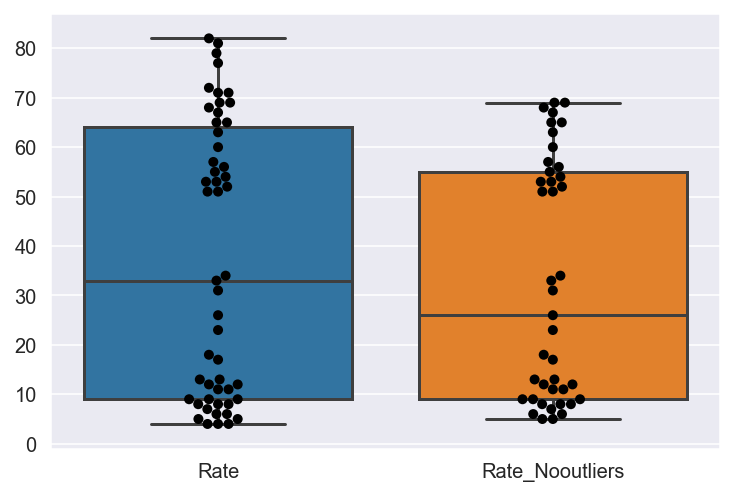

In [197]:
sns.boxplot(data=pd.DataFrame([sat_rate['Rate'], sat_rate_nooutliers['Rate']],
                              index=['Rate', 'Rate_Nooutliers']).T)
sns.swarmplot(data=pd.DataFrame([sat_rate['Rate'], sat_rate_nooutliers['Rate']],
                                index=['Rate', 'Rate_Nooutliers']).T, color='black')

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [198]:
print(f"""
Pearson Correlation: {stats.pearsonr(sat_scores_df['Verbal'], sat_scores_df['Math'])[0]}

Spearmean Correlation: {stats.spearmanr(sat_scores_df['Verbal'],sat_scores_df['Math'])[0]}

Spearmean Correlation compares the rank values of each value
""")


Pearson Correlation: 0.8999093181811046

Spearmean Correlation: 0.9094125143903472

Spearmean Correlation compares the rank values of each value



### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [199]:
sat_scores_df['Percentile'] = sat_scores_df['Rate'].apply(lambda x:
                                                          stats.percentileofscore(sat_scores_df['Rate'], x))
#     Applies elementwise calculation of percentile scoring
# Confirm
sat_scores_df.head()

,State,Rate,Verbal,Math,Verbal - Math,Percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.039216
2,MA,79,511,515,-4,96.078431
3,NY,77,495,505,-10,94.117647
4,NH,72,520,516,4,92.156863


In [200]:
print(sat_scores_df.iloc[23])
print('\n')
print(sat_scores_df.loc[23, 'Percentile'])

State                 CA
Rate                  51
Verbal               498
Math                 517
Verbal - Math        -19
Percentile       55.8824
Name: 23, dtype: object


55.88235294117647


Spearman rank correlation measures the correlation of the rank values.  
Percentile indicates how many of values is this value greater than.   Percentile values can be used to rank  

Perecntile indicates how many values is this value greater than as a percent  
This allows us to easily rank the values among each other. Since the highest value will have the highets percentile.  
While lower values will have lower percentiles.  

Spearman rank correlation measures the correlation of just the rank values.  
In essence, it is is a correlation of percentile scores.  
Both methods of analysis only concern the rank's of the values.  

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Percentile score is uneffected by the magnitidue of the outlier. It only concerns the rank of the value with it's colleagues.

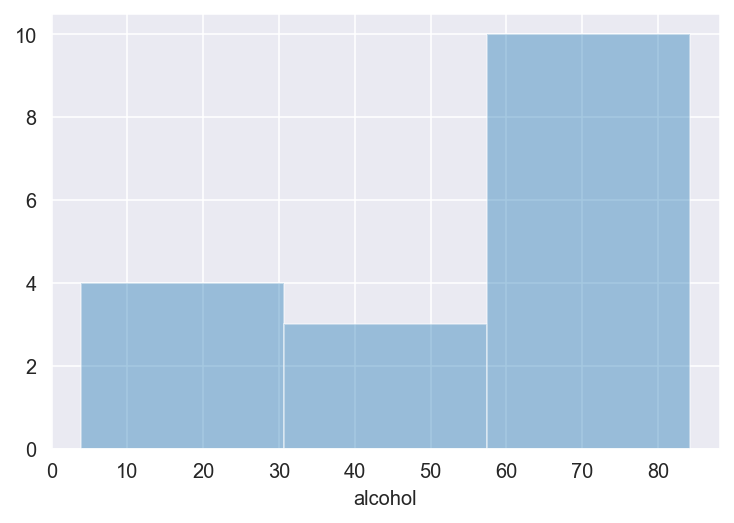

In [201]:
sns.distplot(druguse['alcohol'], kde=False)

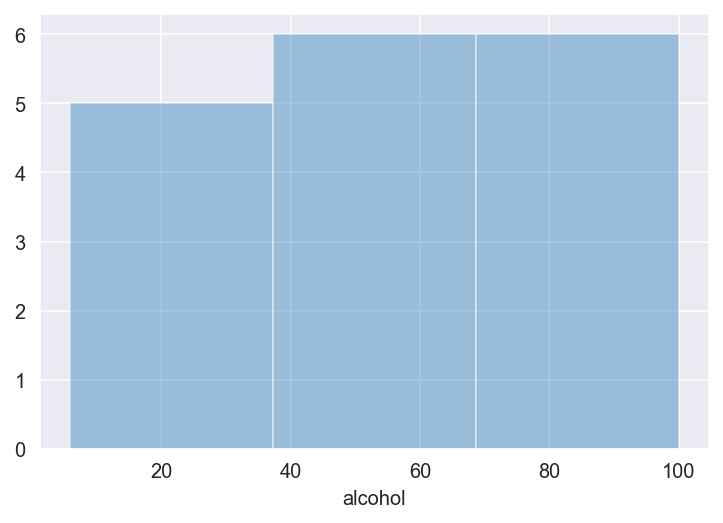

In [202]:
sns.distplot(druguse['alcohol'].apply(
    lambda x: stats.percentileofscore(druguse['alcohol'], x)), kde=False)

Converting to percentiles removes the magnitiude of the values, and replaces them with the magntidue of how many values that value is bigger than.   
This uniformly distributes the data.  
In a displot it creates bins a equal size (seen above).  
In a lineplot it creates a straight line after sorting the values.

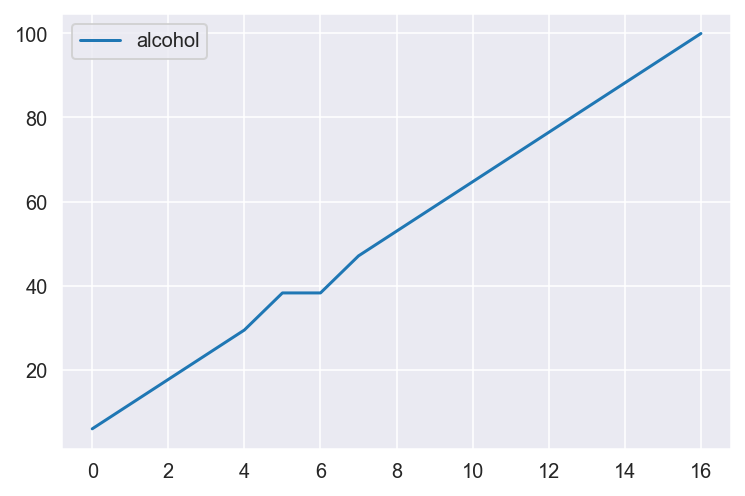

In [203]:
sns.lineplot(data=druguse['alcohol'].apply(lambda x: stats.percentileofscore(druguse['alcohol'], x)).sort_values()
             .reset_index().drop(columns='index'))